# Predicción de Diabetes con regresión logística

Pasos de este estudio

1. Configuración de entorno de trabajo.
2. GCD.
3. EDA.
4. Train Setup.
5. Train.
6. Validation.
7. Conclusion.

### 1. Configuramos el entorno de trabajo

In [1]:
# Importamos librerías necesarias.
import pandas as pd
import numpy as np
from statsmodels.stats.descriptivestats import describe
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### 2. GCD: Getting and Cleaning Data

In [2]:
# https://www.kaggle.com/datasets/kandij/diabetes-dataset
# lectura de datos en Python
df = pd.read_csv('./diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Variables de interes:
* BMI: índice de masa corporal. Es una métrica o KPI basada en el peso y la altura de cada persona. Un BMI muy alto puede ser indicativo de tener diabetes
* Outcome: si la persona tiene diabetes o no

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 2.1 Detectamos y eliminamos registros duplicados

In [5]:
# Detectar registros duplicados en el DataFrame df
duplicados = df[df.duplicated()]
print("Registros duplicados:")
print(duplicados)

# Eliminar registros duplicados del DataFrame df
#df = df.drop_duplicates().reset_index(drop=True)

Registros duplicados:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


#### 2.2 Analizamos Faltantes (Imputamos?)

In [6]:
# Detectar valores nulos en el DataFrame df
null_counts = df.isnull().sum()
print("Valores nulos por columna:")
print(null_counts)

Valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### 2.3 Evaluamos dominancia de valores

In [7]:
# Detectar columnas con dominancia de valores en df
dominance_threshold = 0.95  # Porcentaje para considerar dominancia
dominant_columns = []

for col in df.columns:
    top_freq = df[col].value_counts(normalize=True).iloc[0]
    if top_freq >= dominance_threshold:
        dominant_columns.append((col, df[col].value_counts().idxmax(), top_freq))

if dominant_columns:
    for col, val, freq in dominant_columns:
        print(f"La columna '{col}' tiene dominancia del valor '{val}' con frecuencia {freq:.2%}")
else:
    print("No se detectaron columnas con dominancia de valores.")

No se detectaron columnas con dominancia de valores.


### 3. EDA: Exploratory Data Analysis

#### 3.1 Estadísticos básicos

In [8]:
# Descripción de los datos
describe(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
nobs,7.680000e+02,768.000000,7.680000e+02,768.000000,768.000000,7.680000e+02,768.000000,7.680000e+02,7.680000e+02
missing,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
mean,3.845052e+00,120.894531,6.910547e+01,20.536458,79.799479,3.199258e+01,0.471876,3.324089e+01,3.489583e-01
std_err,1.215892e-01,1.153712,6.984425e-01,0.575626,4.158510,2.844951e-01,0.011956,4.243608e-01,1.721050e-02
upper_ci,4.083362e+00,123.155766,7.047439e+01,21.664665,87.950008,3.255018e+01,0.495309,3.407262e+01,3.826903e-01
lower_ci,3.606742e+00,118.633296,6.773655e+01,19.408252,71.648950,3.143498e+01,0.448443,3.240915e+01,3.152264e-01
std,3.369578e+00,31.972618,1.935581e+01,15.952218,115.244002,7.884160e+00,0.331329,1.176023e+01,4.769514e-01
iqr,5.000000e+00,41.250000,1.800000e+01,32.000000,127.250000,9.300000e+00,0.382500,1.700000e+01,1.000000e+00
iqr_normal,3.706506e+00,30.578671,1.334342e+01,23.721635,94.330566,6.894100e+00,0.283548,1.260212e+01,7.413011e-01
mad,2.771620e+00,25.181793,1.263942e+01,13.659627,84.505079,5.842270e+00,0.247309,9.586405e+00,4.543728e-01


#### 3.2 Scatter Plot

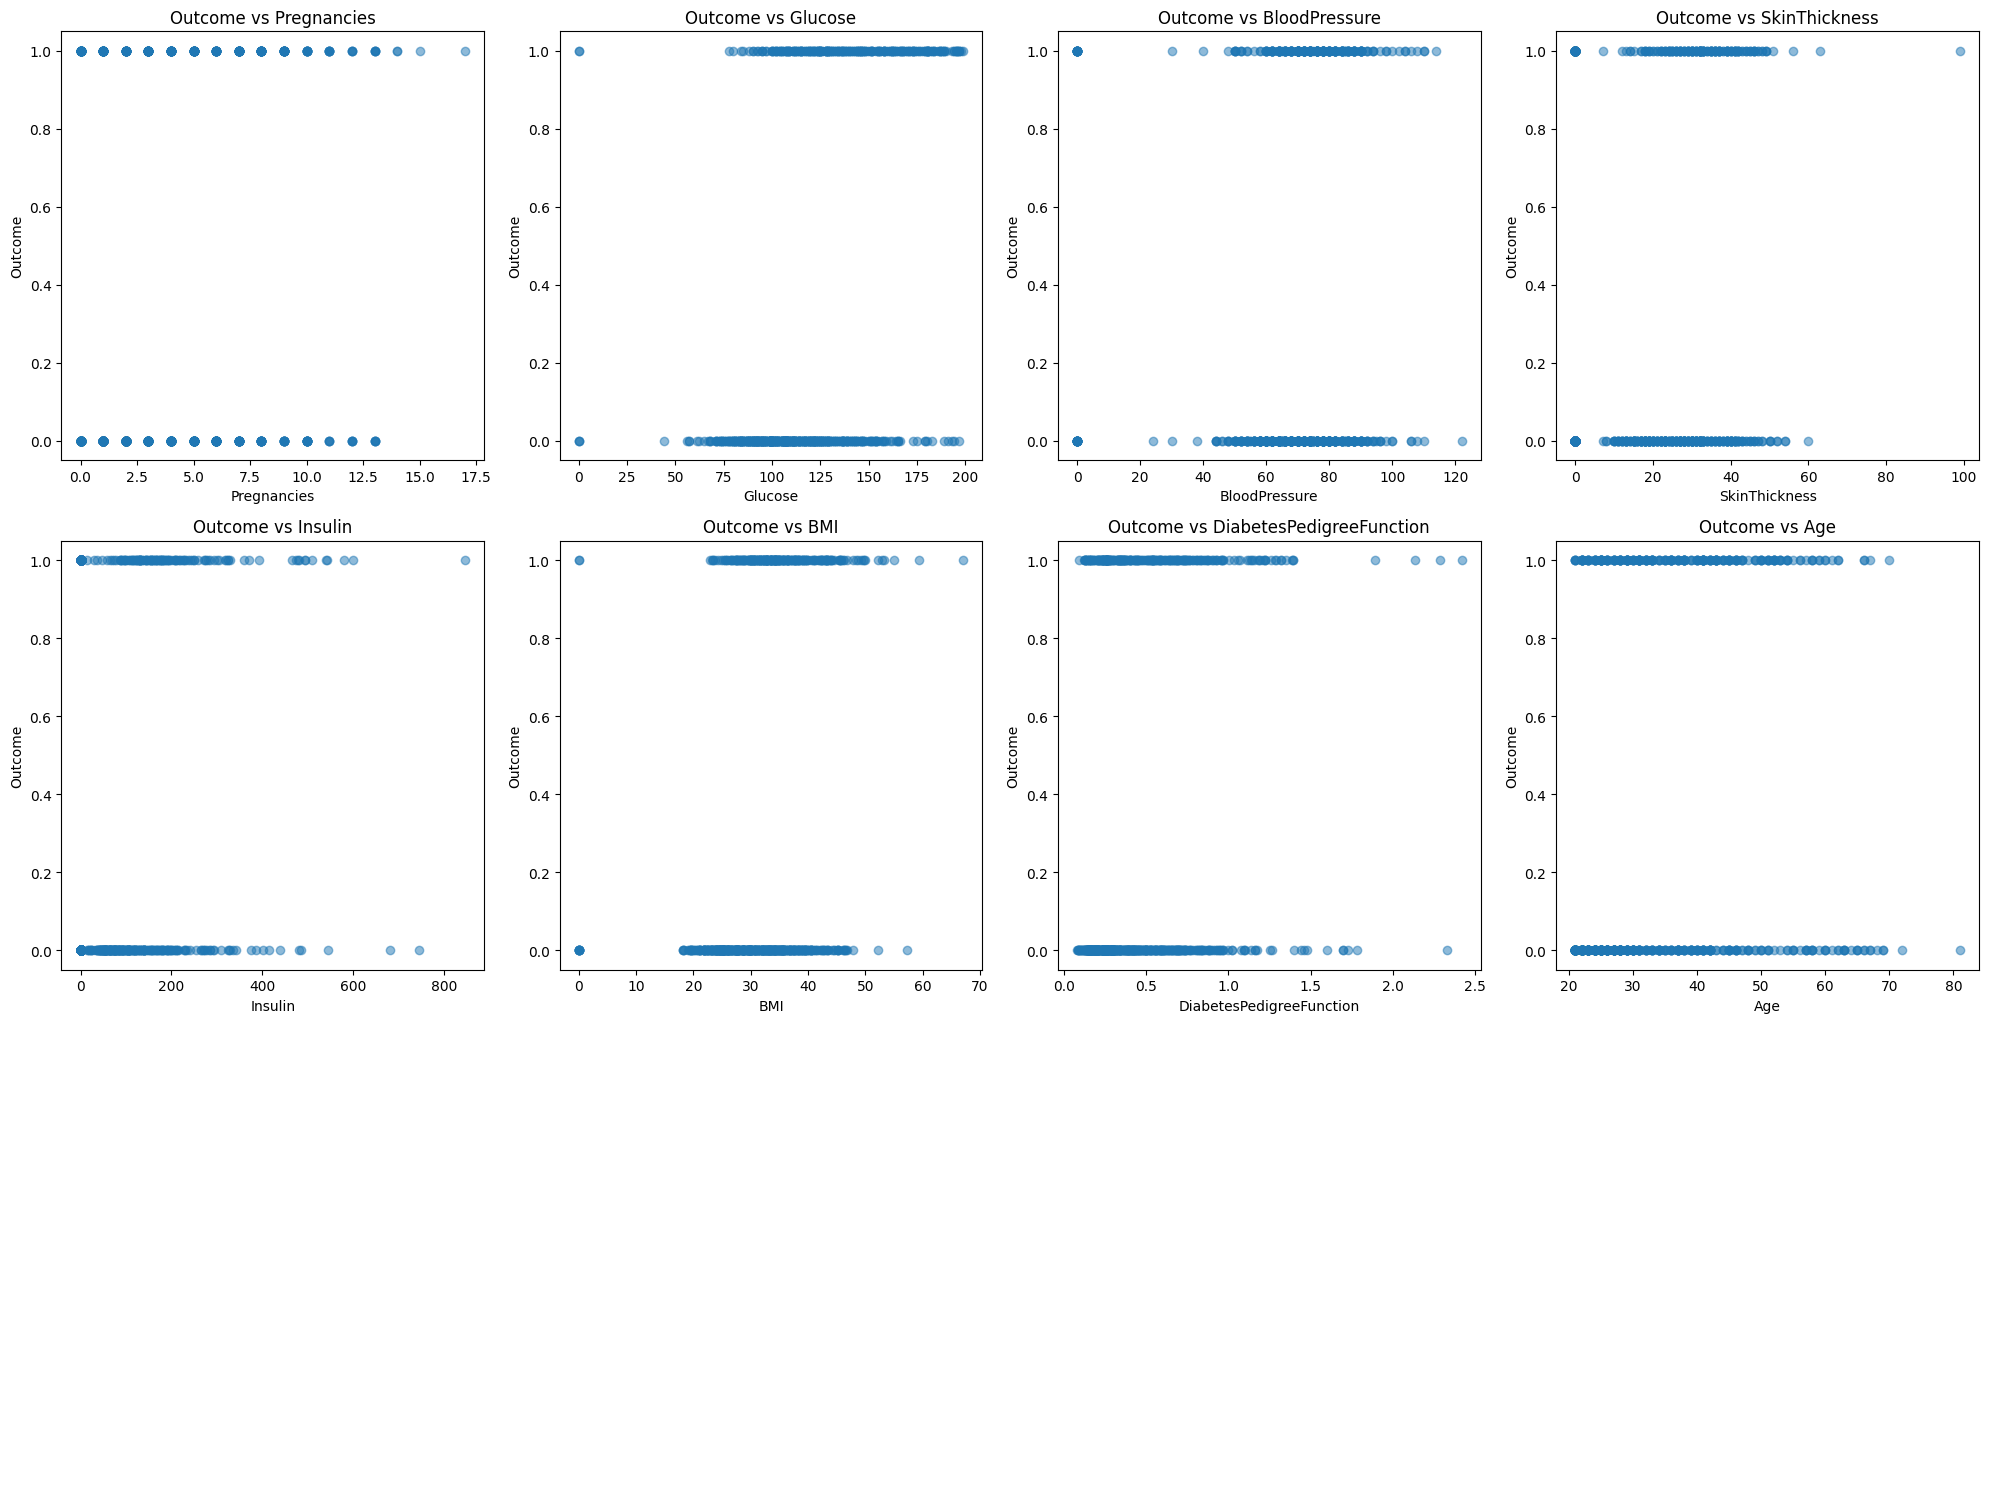

In [9]:
# Crear un scatter plot de cada columna numérica contra 'outcome'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if col != 'Outcome':  # Excluir la columna 'outcome' si existe
        axes[i].scatter(df[col], df['Outcome'], alpha=0.5)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Outcome')
        axes[i].set_title(f'Outcome vs {col}')
    else:
        axes[i].axis('off')

# Ocultar ejes vacíos si hay menos de 12 columnas
for j in range(len(numeric_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### 3.3 Hacemos histogramas

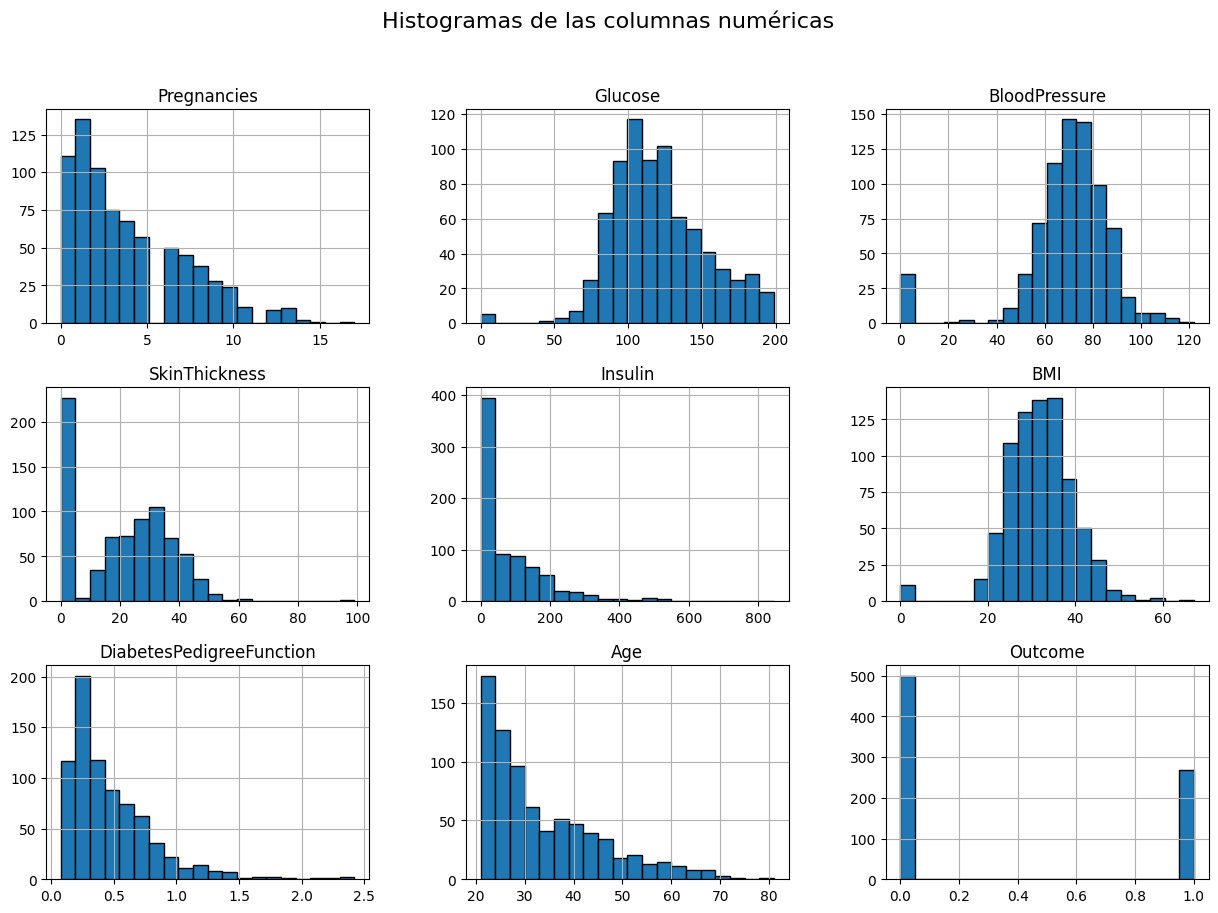

In [10]:
# Generar histogramas para las columnas numéricas
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Histogramas de las columnas numéricas", fontsize=16)
plt.show()

#### 3.4 Hacemos Par plots

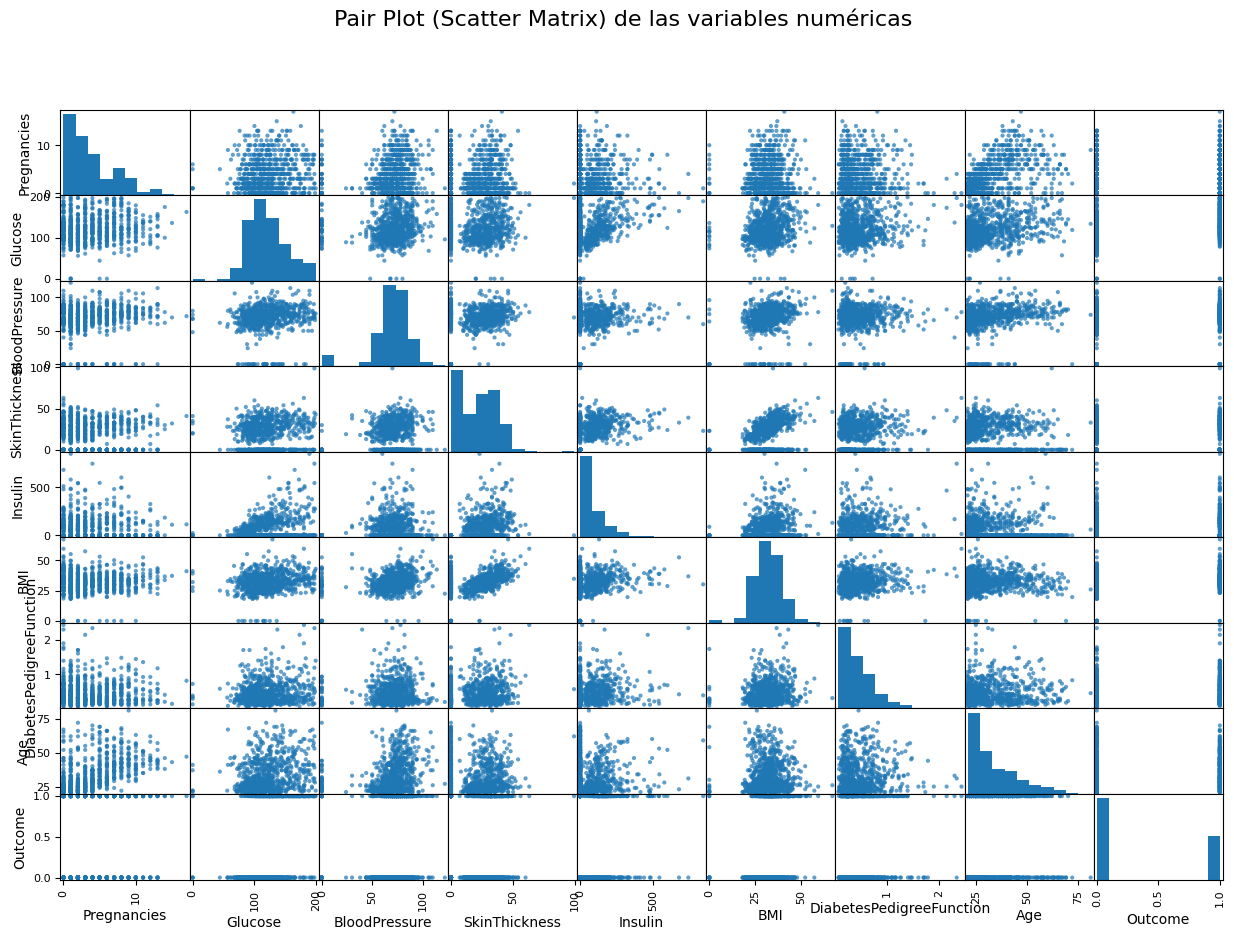

In [11]:
scatter_matrix(df, figsize=(15, 10), diagonal='hist', alpha=0.7)
plt.suptitle("Pair Plot (Scatter Matrix) de las variables numéricas", fontsize=16)
plt.show()

Miramos una tabla y una gráfica de los datos que nos interesan

In [12]:
df[['BMI','Outcome']].head()

,BMI,Outcome
0,33.6,1
1,26.6,0
2,23.3,1
3,28.1,0
4,43.1,1


<Axes: xlabel='BMI', ylabel='Outcome'>

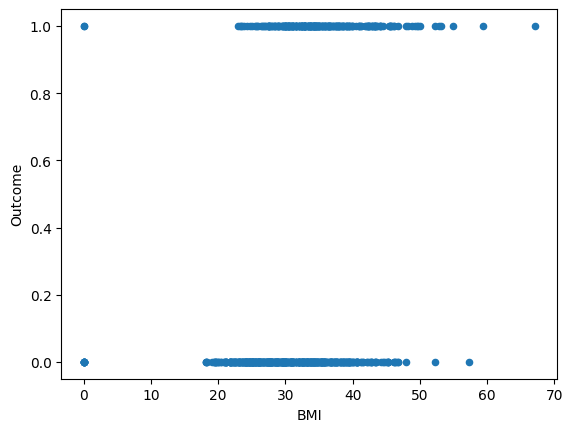

In [13]:
df[['BMI','Outcome']].plot.scatter(x='BMI',y='Outcome')

#### 3.5 Tratamiento de outliers

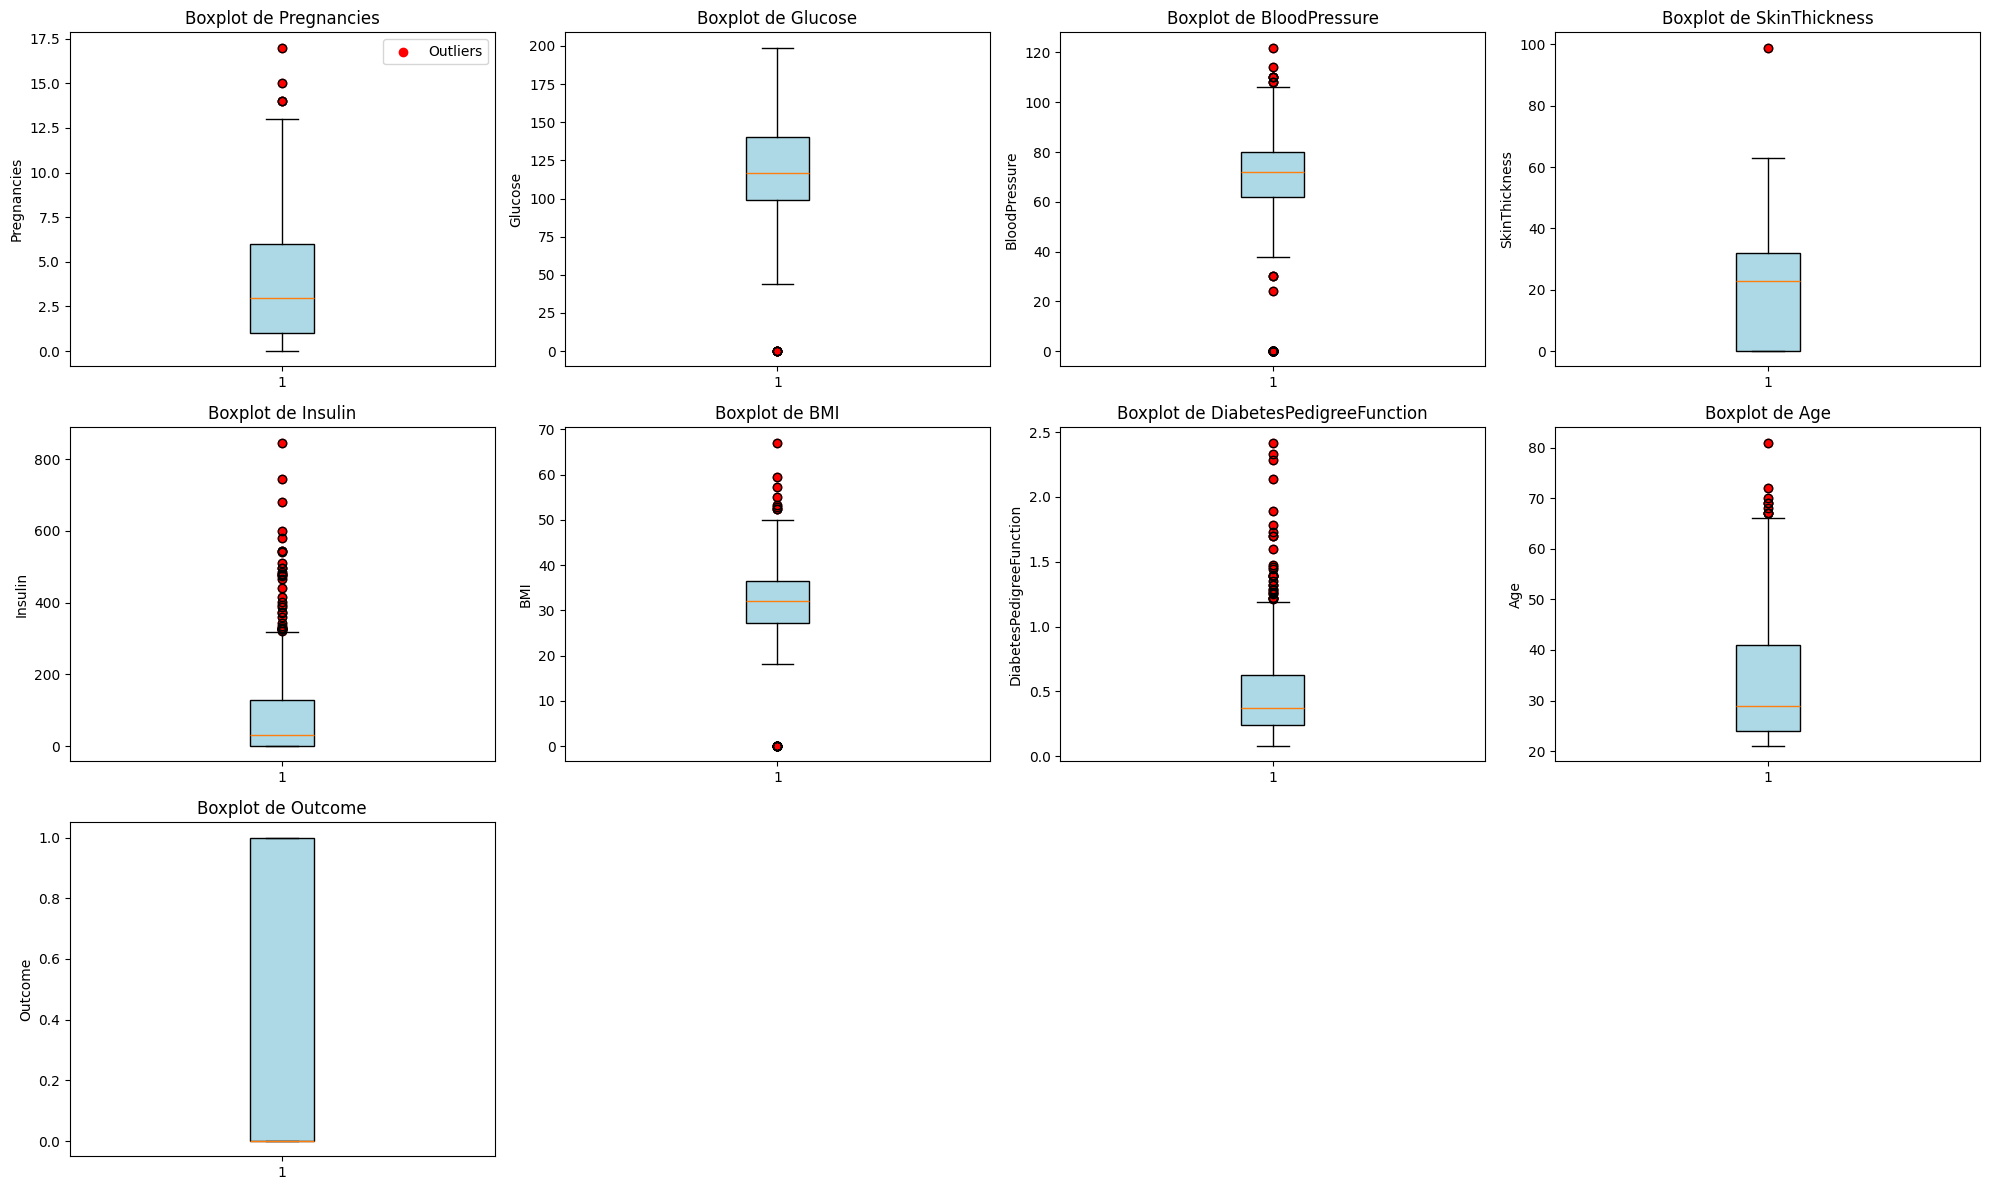

In [14]:
# Crear boxplots para cada columna numérica y marcar outliers
fig, axes_box = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes_box = axes_box.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes_box[idx]
    ax.boxplot(df[col], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.set_title(f'Boxplot de {col}')
    ax.set_ylabel(col)
    # Detección de outliers usando el método IQR
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    if not outliers.empty:
        ax.scatter([1]*len(outliers), outliers, color='red', label='Outliers')
    if idx == 0 and not outliers.empty:
        ax.legend()

# Ocultar ejes vacíos si hay menos de 12 columnas
for idx in range(len(numeric_cols), len(axes_box)):
    axes_box[idx].axis('off')

plt.tight_layout()
plt.show()

### 4. Train Model - Función logística

Vamos a pintar una función logistica sobre estos datos

$$ f_{w,b}\left(\vec{x}^{(i)}\right)=\frac{1}{1+\exp-\left(\beta_1 \vec{x}+\beta_0\right)}$$
Vamos a variar $w,b$ a ver que pasa en los datos

In [15]:
# pruebas de parametro
w = 0.1 # beta_1
b = -5.6 # beta_0

In [16]:
# despues de hacer el modelos (se explica más adelante)
# intercepto (b): [-3.68596089]
# pendiente (w): [[0.09351691]]

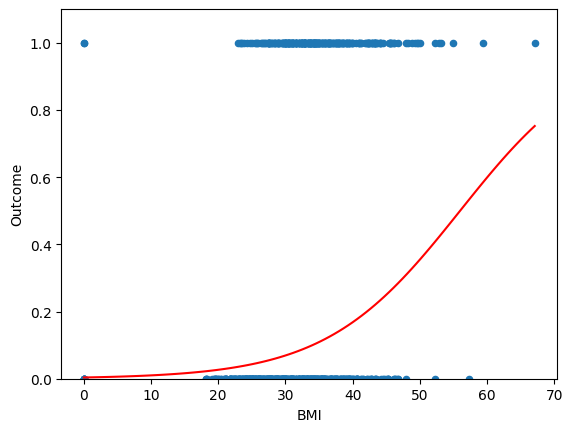

In [17]:
# puntos de la recta
x = np.linspace(0,df['BMI'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
df.plot.scatter(x='BMI',y='Outcome')
plt.plot(x, y, '-r')
plt.ylim(0,df['Outcome'].max()*1.1)
# plt.grid()
plt.show()


## 2.3 Optimización de parámetros

Si escogemos esos parametros $w,b$ para el modelo, ¿Qué tan buenos son?

Podemos utilizar la siguiente estrategia:
* calcular el valor de la función logística para cada dato
* calcular la función de pérdida (se denota con L o loss)
* calcular el promedio de la pérdida para obtener el costo (se denota con Jo cost)

Queremos los valores $w,b$ que resulten en un menor costo

Las ecuaciones para las funciones son

$$ L\left(f_{w,b}\left(\vec{x}^{(i)}\right),y^{(i)}\right)=-y^{(i)}\log\left(f_{w,b}\left(\vec{x}^{(i)}\right)\right)-\left(1-y^{(i)}\right)\log\left(1-f_{w,b}\left(\vec{x}^{(i)}\right)\right) $$

$$ J\left(w,b\right)=\frac{1}{m}\sum_{i=1}^{m}\left[L\left(f_{w,b}\left(\vec{x}^{(i)}\right),y^{(i)}\right)\right] $$


In [18]:
# calculo de las predicciones
df['sigmoid'] = 1/(1+np.exp(-(df['BMI']*w+b)))

# calculo de la funcion de error
df['loss_xi'] = -df['Outcome']*np.log(df['sigmoid'])-(1-df['Outcome'])*np.log(1-df['sigmoid'])
cost_j = df['loss_xi'].mean()
cost_j

np.float64(0.8392179215200345)

Esto lo hemos hecho con los parametros que hemos obtenido a ojo por ciento. Ahora vamos a ser más refinados y calcularlo para muchos parametros a la vez y luego de ahi mirar el que tenga menor costo.

Para eso hacemos lo siguiente:
* Construimos un dataframe con valores para $w,b$ que varían sobre una cuadricula o grid
* Creamos una función de python que calcule el costo $J$ dados parametros $w,b$
* Aplicamos la función sobre el dataframe con los valores $w,b$ en la cuadricula
* Podemos ordenar la tabla resultante para obtener los valores $w,b$ con el menor costo
* Luego hacemos gráficas para verificar el resultado

In [ ]:
# hacemos dataframe para calcular el error en funcion de los parametros w, b

In [19]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [ ]:
df

In [22]:
def sum_error_df(df):
    df['sigmoid'] = 1/(1+np.exp(-(df['BMI']*df['w']+df['b'])))
    df['loss_xi'] = -df['Outcome']*np.log(df['sigmoid'])-(1-df['Outcome'])*np.log(1-df['sigmoid'])
    j_cost = df['loss_xi'].mean()
    return(j_cost)

In [21]:
df['error'] = df.apply(sum_error_df, axis=1)

KeyError: 'BMI'

In [ ]:
df.sort_values(by=['error']).head()

In [ ]:
df_3d = df.pivot(index='w', columns='b', values='error')

In [ ]:
df_3d.head()

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

In [ ]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)

## Bonus: Optimizando los parámetros

Esta sección es opcional.

Vamos a utilizar el método del gradiente descendente para calcular los valores optimos de $w,b$.

Para esto tenemos que calcular el gradiente para $w,b$ con respecto de la función J (esta es la que hemos gráficado), sus funciones son

$$ \frac{\partial}{\partial w}J\left(w,b\right)=\frac{1}{m}\sum_{i=1}^{m}\left(f_{w,b}\left(\vec{x}^{(i)}\right)-y^{(i)}\right)x^{(i)} $$

$$ \frac{\partial}{\partial b}J\left(w,b\right)=\frac{1}{m}\sum_{i=1}^{m}\left(f_{w,b}\left(\vec{x}^{(i)}\right)-y^{(i)}\right)$$

Las funciones respectivas en python serían

In [ ]:
def delta_j_w(w, b):
    train['sigmoid'] = 1/(1+np.exp(-(train['BMI']*w+b)))
    train['partial_loss'] = (train['sigmoid']-train['Outcome'])*train['BMI']
    derivative = train['partial_loss'].mean()
    return(derivative) 

def delta_j_b(w, b):
    train['sigmoid'] = 1/(1+np.exp(-(train['BMI']*w+b)))
    train['partial_loss'] = (train['sigmoid']-train['Outcome'])
    derivative = train['partial_loss'].mean()
    return(derivative) 

Damos valores iniciales a $w,b$

In [ ]:
w_0 = 0.09
b_0 = -3.57

Empezamos a iterar hasta obtener valores que no varíen tanto

In [ ]:
alpha_w = 0.001
alpha_b = 0.1

w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)

w_0 = w_new
b_0 = b_new

print(w_0, b_0)

In [ ]:
# valores optimos de sklearn (más abajo la explicación)
# w = 0.09351691
# b = -3.68596089

Ahora vamos a hacer lo mismo pero mucho más rápido con sklear

In [ ]:
from sklearn.linear_model import LogisticRegression

# definiendo input y output
X_train = np.array(train['BMI']).reshape((-1, 1))
Y_train = np.array(train['Outcome'])

# creando modelo
model = LogisticRegression()
model.fit(X_train, Y_train)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")